In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [10]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': Operation not supported
 cfg		    darknet   generate_train.py   obj2.zip    yolov3
'Colab Notebooks'   data      images		  video.mp4   yolov32


In [11]:
%cd /mydrive

/content/gdrive/My Drive


In [0]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 12604 (delta 0), reused 0 (delta 0), pack-reused 12600
Receiving objects: 100% (12604/12604), 11.66 MiB | 5.79 MiB/s, done.
Resolving deltas: 100% (8564/8564), done.
Checking out files: 100% (1983/1983), done.


In [0]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/gdrive/My Drive/darknet


In [0]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:909:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/

In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights


--2020-03-04 06:16:59--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   278KB/s    in 15m 8s  

2020-03-04 06:32:09 (267 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
!ls /mydrive/yolov32

backup2  generate_train.py  obj2.zip  obj.data	obj.names  yolov3_custom2.cfg


In [0]:
!cp /mydrive/yolov32/obj2.zip ../

In [0]:
!unzip ../obj2.zip -d data/

Archive:  ../obj2.zip
   creating: data/obj/
  inflating: data/obj/asian1.jpg     
 extracting: data/obj/asian1.txt     
  inflating: data/obj/asian10.jpg    
 extracting: data/obj/asian10.txt    
  inflating: data/obj/asian100.jpg   
 extracting: data/obj/asian100.txt   
  inflating: data/obj/asian101.jpg   
 extracting: data/obj/asian101.txt   
  inflating: data/obj/asian102.jpg   
  inflating: data/obj/asian102.txt   
  inflating: data/obj/asian103.jpg   
  inflating: data/obj/asian103.txt   
  inflating: data/obj/asian104.jpg   
 extracting: data/obj/asian104.txt   
  inflating: data/obj/asian105.jpg   
 extracting: data/obj/asian105.txt   
  inflating: data/obj/asian106.jpg   
 extracting: data/obj/asian106.txt   
  inflating: data/obj/asian107.jpg   
  inflating: data/obj/asian107.txt   
  inflating: data/obj/asian108.jpg   
 extracting: data/obj/asian108.txt   
  inflating: data/obj/asian109.jpg   
  inflating: data/obj/asian109.txt   
  inflating: data/obj/asian11.jpg    
 extr

In [0]:
!cp /mydrive/yolov32/yolov3_custom2.cfg ./cfg

In [0]:
!cp /mydrive/yolov32/obj.names ./data
!cp /mydrive/yolov32/obj.data  ./data

In [0]:
!cp /mydrive/yolov32/generate_train.py ./

In [0]:
!python generate_train.py

Traceback (most recent call last):
  File "generate_train.py", line 4, in <module>
    os.chdir(os.path.join("data", "obj"))
NotADirectoryError: [Errno 20] Not a directory: 'data/obj'


In [0]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-03-04 06:40:36--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   123KB/s    in 19m 1s  

2020-03-04 06:59:39 (139 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [13]:
%cd darknet
!chmod +x ./darknet
# !./darknet detector train data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolov32/backup2/yolov3_custom2_last.weights -dont_show


/content/gdrive/My Drive/darknet


In [0]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom2.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom2.cfg
%cd ..

/content/gdrive/My Drive/darknet/cfg
/content/gdrive/My Drive/darknet


In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177

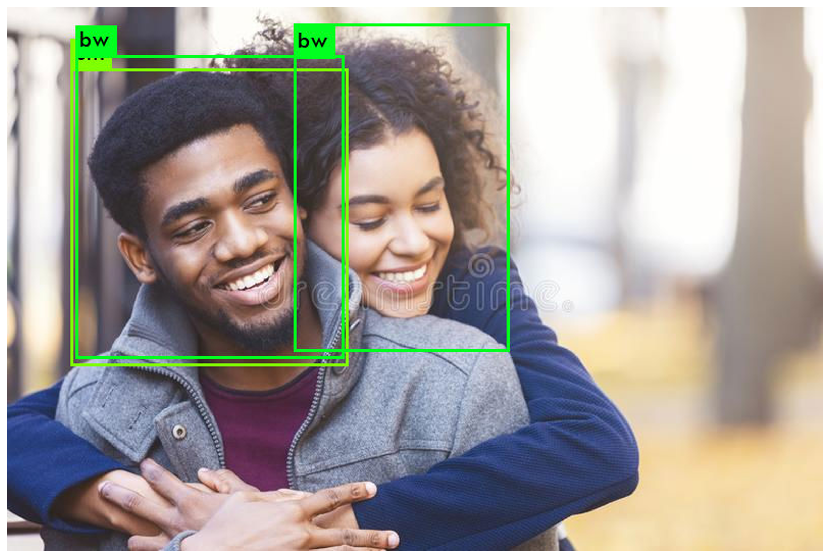

In [0]:
!./darknet detector test data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolov32/backup2/yolov3_custom2_last.weights /mydrive/images/black101.jpg -thresh 0.3
imShow('predictions.jpg')


In [0]:
!cp predictions.jpg /mydrive/images/detection100.jpg

In [16]:
!./darknet detector demo data/obj.data cfg/yolov3_custom2.cfg /content/gdrive/My\ Drive/yolov32/backup2/yolov3_custom2_last.weights /content/gdrive/My\ Drive/video.mp4 -out_filename result.avi -dont_show

Streaming output truncated to the last 5000 lines.
wm: 97% 

FPS:27.4 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

wm: 96% 

FPS:27.3 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

wm: 93% 

FPS:27.2 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

wm: 85% 
im: 29% 

FPS:27.2 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

wm: 74% 
im: 38% 

FPS:27.1 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

wm: 41% 

FPS:27.1 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

iw: 42% 

FPS:27.2 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

wm: 62% 

FPS:27.1 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

wm: 39% 

FPS:26.9 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

iw: 38% 

FPS:26.6 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

iw: 49% 

FPS:26.7 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

iw: 50% 

FPS:26.8 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

iw: 57% 

FPS:26.9 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

iw: 68% 

FPS:26.7 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

iw: 65% 

FPS:26.7 	 AVG_FPS:27.3

 cvWriteFrame 
Objects:

iw: 58% 

FPS:26.8 	 AVG_FPS:27